## Intoduction to the problem

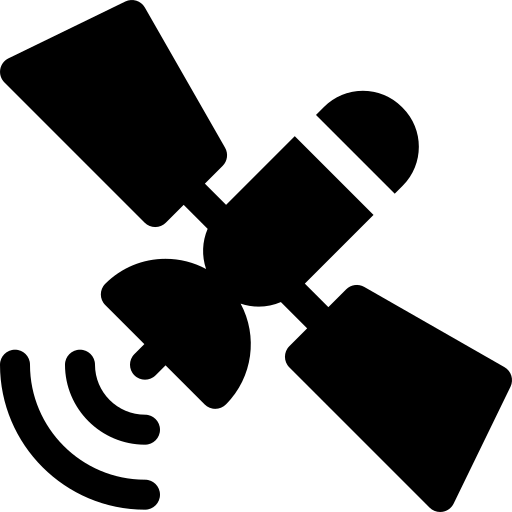

In the fight against climate change it is of utter importance to monitor carbon emissions and thus scientists are ablet to find main sources and potential patterns of carbon outputs. In contrast to Europe and North America, most of African countries do not have extensive systems to monitor such emissions from the ground.
In this competition open-source emission data of 2020 - 2021 from the Sentinel-5P satellite is analyzed and utilized to predict future carbon emissions in 2022.

The data consists of the following features resulting from the sentinel-5P measurements:

* Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
* Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
* Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
* Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
* UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
* Ozone - COPERNICUS/S5P/NRTI/L3_O3
* Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD

The task is to build a model that is able to predict the emission target for each week at each location in 2022.


## Libraries 📖

In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load data 🗃️

In [3]:
IMPORT_PATH = "./"
train_original = pd.read_csv(IMPORT_PATH + "train.csv", index_col='ID_LAT_LON_YEAR_WEEK')
test_original = pd.read_csv(IMPORT_PATH + "test.csv", index_col='ID_LAT_LON_YEAR_WEEK')

## Data exploration 🧭

First, let's have a look what data we are dealing with and what is the quality.

In [4]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

In [5]:
train_original.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [6]:
# find week no of to be predicted data in 2022
train_original['week_no'].nunique()

53

In [7]:
# find week no of to be predicted data in 2022
test_original['week_no'].nunique()

49

In [8]:
missed_vals = train_original.isnull().sum()
missed_vals[missed_vals > 0].sort_values(axis=0, ascending=False).head(15)

UvAerosolLayerHeight_aerosol_pressure                     78584
UvAerosolLayerHeight_solar_zenith_angle                   78584
UvAerosolLayerHeight_aerosol_height                       78584
UvAerosolLayerHeight_aerosol_optical_depth                78584
UvAerosolLayerHeight_sensor_zenith_angle                  78584
UvAerosolLayerHeight_sensor_azimuth_angle                 78584
UvAerosolLayerHeight_solar_azimuth_angle                  78584
NitrogenDioxide_NO2_slant_column_number_density           18320
NitrogenDioxide_tropopause_pressure                       18320
NitrogenDioxide_tropospheric_NO2_column_number_density    18320
NitrogenDioxide_absorbing_aerosol_index                   18320
NitrogenDioxide_cloud_fraction                            18320
NitrogenDioxide_sensor_altitude                           18320
NitrogenDioxide_sensor_azimuth_angle                      18320
NitrogenDioxide_sensor_zenith_angle                       18320
dtype: int64

**Conclusion**: UvAerosolLayerHeight_x has the most missing values, check how much percent are valid

In [9]:
print((train_original['UvAerosolLayerHeight_aerosol_pressure'].notnull().sum() / 
       train_original['UvAerosolLayerHeight_aerosol_pressure'].size) * 100, "%")

0.5555344646495325 %



⚠️ <span style="background-color:gold">This is valid for all UvAerosolLayerHeight_X and makes these features unusable thus it will be removed later on !</span> ⚠️

In [10]:
# Features can be grouped (e.g. measured chemical compounds)
col_groups = []
for column in train_original.columns:
    if column.split('_')[0] not in col_groups:
        col_groups.append(column.split('_')[0])  

col_groups

['latitude',
 'longitude',
 'year',
 'week',
 'SulphurDioxide',
 'CarbonMonoxide',
 'NitrogenDioxide',
 'Formaldehyde',
 'UvAerosolIndex',
 'Ozone',
 'UvAerosolLayerHeight',
 'Cloud',
 'emission']

In [11]:
# Check invalid values per year
train_original.isnull().groupby(train_original['year']).sum().sum(axis=1)

year
2019    309254
2020    333338
2021    347499
dtype: int64

In [12]:
train_original['emission'].describe()

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

In [13]:
train_grouped_by_location = train_original.groupby(['latitude','longitude'])
print("Unique locations: ", train_grouped_by_location.nunique().shape[0])
locations_mean_emmissions = train_grouped_by_location['emission'].mean().to_frame().reset_index(inplace=False)
locations_no_emissions = locations_mean_emmissions[locations_mean_emmissions['emission'] == 0]
print("Locations with no emissions ever: ", locations_no_emissions.shape[0])
locations_no_emissions

Unique locations:  497
Locations with no emissions ever:  15


,latitude,longitude,emission
38,-2.898,29.002,0.0
43,-2.859,29.041,0.0
52,-2.841,29.159,0.0
62,-2.817,29.283,0.0
118,-2.496,28.504,0.0
224,-1.974,28.526,0.0
264,-1.839,28.761,0.0
266,-1.833,28.467,0.0
283,-1.730,28.470,0.0
286,-1.712,28.688,0.0


There are 497 unique locations in the dataframe of which 15 have no emissions at all.

In [14]:
locations_mean_emmissions['emission'].sort_values(ascending=False).head(10)

139    2233.431628
203    1221.886518
360     475.289138
453     455.398039
363     409.606870
127     395.499449
105     353.031771
260     347.017595
158     336.199968
247     324.808862
Name: emission, dtype: float64

 🔍 Also two locations have particular high mean emission values ! 🔍

In [15]:
# First convert the date from the two features into pandas time stamp. Just take Monday as a random day in the specific week.
## before:
train_original[['year', 'week_no']].head(3)

,year,week_no
ID_LAT_LON_YEAR_WEEK,,
ID_-0.510_29.290_2019_00,2019,0
ID_-0.510_29.290_2019_01,2019,1
ID_-0.510_29.290_2019_02,2019,2


In [16]:
plot_data = train_original.copy(deep=True)
plot_data['date'] = pd.to_datetime(plot_data['year'].astype(str) + '.' + plot_data['week_no'].astype(str) +  '.Mon', format="%Y.%W.%a")

In [17]:
# after:
plot_data[['year', 'week_no', 'date']].head(3)

,year,week_no,date
ID_LAT_LON_YEAR_WEEK,,,
ID_-0.510_29.290_2019_00,2019,0,2018-12-31
ID_-0.510_29.290_2019_01,2019,1,2019-01-07
ID_-0.510_29.290_2019_02,2019,2,2019-01-14


Let's create diagrams of the emissions to see how they are distributed and what are some trends.

In [18]:
plot_data['emission'].describe()

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

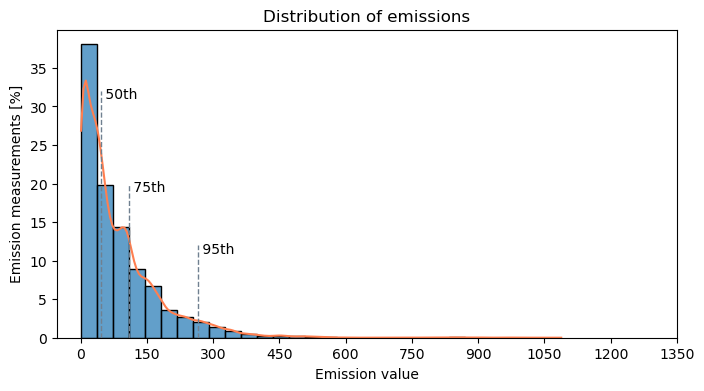

In [19]:
# For the histogram plot very small values below 1 and really big values greater 1000 are cut off for visibility
X_MAX_PLOT = 1500
plt.figure(figsize=(8,4))
ax = sb.histplot(data=plot_data['emission'][(plot_data['emission'] >= 1) & (plot_data['emission'] <= X_MAX_PLOT)], 
                   bins=30, alpha=0.7, kde=True, stat='percent', line_kws={'color': "red", 'lw': 1.5, 'ls': '-'})
ax.set(xlabel='Emission value', ylabel='Emission measurements [%]')
ax.lines[0].set_color('coral')
ax.set_xticks(np.arange(0, X_MAX_PLOT, 150))

quant_50, quant_75, quant_95 = plot_data['emission'].quantile([0.50, 0.75, 0.95])
quantiles = [[quant_50, 0.8, " 50th", 31], [quant_75, 0.5, " 75th", 19], [quant_95, 0.3, " 95th", 11]]
for quantile in quantiles:
    plt.axvline(x=quantile[0], ymax=quantile[1] ,linestyle='--', color="slategrey", linewidth=1.0)
    plt.text(x=quantile[0], y=quantile[3], s=quantile[2])

plt.title("Distribution of emissions")
plt.show()

➡️ <b><span style="background-color:lightblue">Conclusion: Most of the emission values lie below 200</span><b>

Mean value:  40982.203861583235


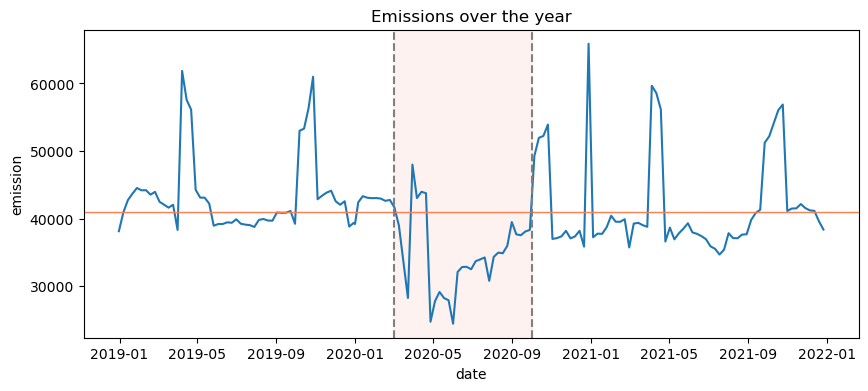

In [20]:
import matplotlib.patches as patches
import matplotlib.dates as mdates

# Not let's have a look at emissions per year
plt.figure(figsize=(10,4))
grouped_emissions = plot_data.groupby('date')['emission'].sum()
ax = sb.lineplot(data=grouped_emissions)

emission_mean = grouped_emissions.mean()
plt.axhline(y=emission_mean ,linestyle='-', color="coral", linewidth=1.0)
#draw rectangle to emphasize outlier
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-10-01'), color='salmon', alpha=0.1)
plt.axvline(pd.Timestamp('2020-03-01'), linestyle = "--", color='grey')
plt.axvline(pd.Timestamp('2020-10-01'), linestyle = "--", color='grey')

plt.title("Emissions over the year")
print("Mean value: ", emission_mean)

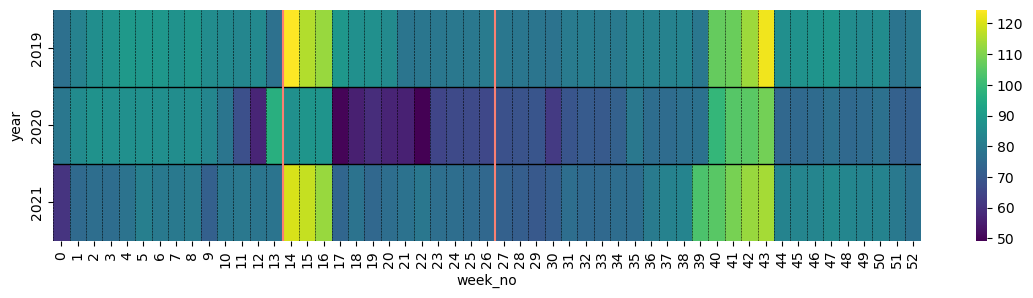

In [21]:
# And create to heatmap of the averaged emissions per week for each year to find patterns
plt.figure(figsize=(14,3))
ax_hm = sb.heatmap(plot_data.pivot_table(index='year', columns='week_no', values='emission', aggfunc=np.mean), cmap="viridis")
ax_hm.hlines([1, 2], *ax_hm.get_xlim(), color="black", linewidth=1.0)
ax_hm.vlines(np.arange(start=0, stop=53, step=1), *ax_hm.get_ylim(),linestyle='--', color="black", linewidth=0.4)
plt.axvline(14, linestyle = "-", color='salmon')
plt.axvline(27, linestyle = "-", color='salmon')


In both the line plot (cumulated values over the year) and the heatmap (mean values per week) several outliers in the emissions, compared to 2019 and 2021, are clearly visible. Escpecially in the second quarter of 2020. This is likely linked to restrictive COVID-19 lockdown measures.

⚠️ <span style="background-color:gold">This specific time window needs to be handled in a proper way to prevent unwanted effects on our model later on.</span> ⚠️

Moreover, seasonal patterns can be identified. In 2019 and 2021 during 13-17th weeks and 39-44th weeks there are particular high emissions.

As further below already realized there are two locations with particular high mean measurements over the time.

In [22]:
locations_mean_emmissions['emission'].sort_values(ascending=False)[0:2]

139    2233.431628
203    1221.886518
Name: emission, dtype: float64

Let's find out where this two and the other emisison sources are

In [23]:
import plotly.express as px

fig = px.scatter_mapbox(locations_mean_emmissions, 
                        lat="latitude", 
                        lon="longitude", 
                        color="emission",
                        color_continuous_scale=px.colors.sequential.Turbo,
                        size="emission",
                        zoom=7, 
                        height=500,
                        width=900)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

➡️ 
<b><span style="background-color:lightblue">The biggest source is near Nyungwe National Park. Potential reasons could be deforestation or wildfires. The second biggest source is near Karongi but it is hard to make assumptions regarding possible emitters in this area.</span><b>

### Summary of exploration 💡
* No features in the data are categorical but only numerical.
* The UvAerosolLayerHeight_X features miss nearly all values and makes these feature group unusable -> will be removed.
* Features belong to subgroups (e.g. measured chemical compounds).
* There are 497 unique locations in the dataframe of which 15 have no emissions at all.
* Most of the emission values lie below 200. The range is from 0 to 3167.
* The 2020 emissions deviate from 2019, 2021 and are generally recuded compared to these years. Especially in the second quarter of 2020 a great dip occurs. --> likely linked to restrictive COVID-19 lockdown measures.
* Excluding the effects of Covid seasonal patterns can be identified with peaks and valleys.
* Two locations have an extensively higher emission compared to all other unique locations. Near Nyungwe National Park and Karongi
* Train data consists of 53 weeks in all three years, test data of 49 weeks for 2022



## Pre-processing of data ⚙️

Add pandas timestamp like below already happened for the visualization data 

In [24]:
train = train_original.copy(deep=True)
train['date'] = pd.to_datetime(train_original['year'].astype(str) + '.' + train_original['week_no'].astype(str) +  '.Mon', format="%Y.%W.%a")

As found out in the previous analysis the "**UvAerosolLayerHeight**" feature group has **less than 1 percent** of valid values. Due to this we drop these features all together.

In [25]:
train.drop(columns=list(train.filter(regex='UvAerosolLayerHeight')), inplace=True)

The Covid-19 restrictions influence the emission data in 2020 so that it strongly deviates from a usual year. The many unique outliers do not help to train a generalised model and make predictions for "normal" years. An easy and straight forward way to compensate this is to scale the values of 2020 with the ratio between 2019/2021 and 2020.

In [26]:
# calculate the week average of 2019, 2021
train_emission_no_covid = train[train['year'].isin((2019, 2021))]
train_emission_no_covid_avg = train_emission_no_covid.groupby('week_no')['emission'].mean()
# calculate the week average of 2020 aka covid restriction year
train_emission_covid = train[train['year'] == 2020]
train_emission_covid_avg = train_emission_covid.groupby('week_no')['emission'].mean()

In [27]:
# calculate ratio between these means
ratios_each_week = train_emission_no_covid_avg / train_emission_covid_avg

In [28]:
# And then scale the numbers of 2020 by replacing all week values by ratios and multiply it with 2020 emissions per week
rows_2020 = (train['year'] == 2020)
train.loc[rows_2020,'emission'] *= train['week_no'].map(ratios_each_week)

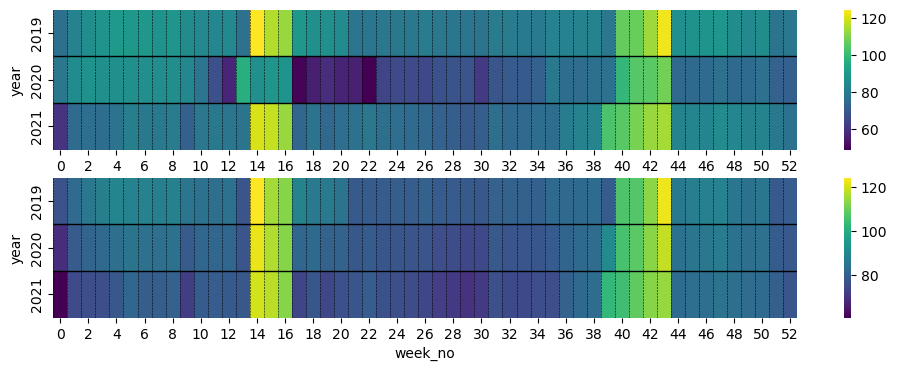

In [29]:
# And create again a heatmap of the averaged emissions per week
fig, axs = plt.subplots(nrows=2)
fig.set_figwidth(12)
fig.set_figheight(4)

plots_hm = []
plots_hm.append(sb.heatmap(train_original.pivot_table(index='year', columns='week_no', values='emission', aggfunc=np.mean), cmap="viridis", ax=axs[0]))
plots_hm.append(sb.heatmap(train.pivot_table(index='year', columns='week_no', values='emission', aggfunc=np.mean), cmap="viridis", ax=axs[1]))

for hm in plots_hm:
    hm.hlines([1, 2], *ax_hm.get_xlim(), color="black", linewidth=1.0)
    hm.vlines(np.arange(start=0, stop=53, step=1), *ax_hm.get_ylim(),linestyle='--', color="black", linewidth=0.4)

➡️ 
<b><span style="background-color:lightblue">As one can see the pattern of 2020 now fits the other two years much better.</span><b>

### Add and select features

#### Add holidays

In [30]:
train['has_holidays'] = True

# source: https://www.gov.rw/holidays
rows_2019 = (train['year'] == 2019)
train.loc[rows_2019, 'has_holidays'] = (train[rows_2019]['week_no'].isin([0, 4, 13, 14, 17, 26, 30, 32, 51]))
rows_2020 = (train['year'] == 2020)
train.loc[rows_2020, 'has_holidays'] = (train[rows_2020]['week_no'].isin([0, 4, 14, 17, 26, 31, 32, 51]))
rows_2021 = (train['year'] == 2021)
train.loc[rows_2021, 'has_holidays'] = (train[rows_2021]['week_no'].isin([0, 4, 13, 16, 25, 30, 31, 50]))

In [31]:
# source: https://climateknowledgeportal.worldbank.org/country/rwanda/climate-data-historical
def set_season(month):
    if 3 <= month <= 5:
        return 0 
    elif 6 <= month <= 8:
        return 1 
    elif 9 <= month <= 11:
        return 2
    elif 12 <= month <= 2:
        return 3
        
train['season'] = train['date'].dt.month.apply(lambda month: set_season(month))

#### Pre-select training features
As a first start only a small number of features will be use to train a model to see where this leads.

In [32]:
train_features = ['year', 'week_no', 'latitude', 'longitude', 'has_holidays', 'season']

### Prepare data for training

#### Split train data into X and y

In [33]:
X_train = train.drop(columns='emission')
y_train = train['emission']

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

pipe = Pipeline([('imputer', SimpleImputer()), ('scaler', RobustScaler())])

In [35]:
pipe_fitted = pipe.fit(X_train[train_features])

In [36]:
X_train_prep = pipe_fitted.transform(X_train[train_features])
X_train_prep = pd.DataFrame(X_train_prep, columns=X_train[train_features].columns, index=X_train.index)

## Model selection

In [37]:
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GroupKFold, cross_val_score

seed = 42
k_fold = GroupKFold(3)

models = [
('ridge', Ridge(random_state=seed)),
('rfr', RandomForestRegressor(min_samples_leaf=6, random_state=seed)),
('sgd', SGDRegressor(random_state=seed)),
('kn', KNeighborsRegressor())]


for (name, model) in models:
    model.fit(X_train_prep, y_train)
    scores = -cross_val_score(model, X_train_prep, y_train, scoring="neg_root_mean_squared_error", 
                          cv=k_fold.split(X_train_prep, y_train, groups=train['year']))

    print("Model:", name)
    print(f'Training RMSE: {mean_squared_error(y_train, model.predict(X_train_prep), squared=False):.2f}')
    print(f"Cross validation RMSE: {scores.mean():.4f}")
    print("----------")

Model: ridge
Training RMSE: 147.81
Cross validation RMSE: 147.8105
----------
Model: rfr
Training RMSE: 11.65
Cross validation RMSE: 20.6827
----------
Model: sgd
Training RMSE: 147.82
Cross validation RMSE: 147.8125
----------
Model: kn
Training RMSE: 86.54
Cross validation RMSE: 75.3920
----------


Clearly the random forest model performs best even with only the default hyperparameters

### Prediction of test data

In [38]:
test = test_original.copy(deep=True)
test['date'] = pd.to_datetime(test_original['year'].astype(str) + '.' + test_original['week_no'].astype(str) +  '.Mon', format="%Y.%W.%a")
# drop UvAerosolLayer
test.drop(columns=list(test.filter(regex='UvAerosolLayerHeight')), inplace=True)
# add holidays
test['has_holidays'] = True
test['has_holidays'] = test['week_no'].isin([0, 4, 13, 16, 25, 30, 31, 50])
# add season
test['season'] = test['date'].dt.month.apply(lambda month: set_season(month))

In [39]:
# features are the same
test_features = train_features
# fit the pre-processing pipe to the test data 
pipe_fitted_test = pipe.fit(test[test_features])
X_test_prep = pipe_fitted_test.transform(test[train_features])
X_test_prep = pd.DataFrame(X_test_prep, columns=test[test_features].columns, index=test.index)

In [60]:
# predict with already trained random forests model and add to new submission dataframe
predictions = models[1][1].predict(X_test_prep)
predictions_df = pd.DataFrame(data=test, columns=['emission'])
predictions_df['emission'] = predictions

In [63]:
plot_data_test = pd.concat([test, predictions_df], axis=1)

Text(0.5, 1.0, 'Emissions over the year')

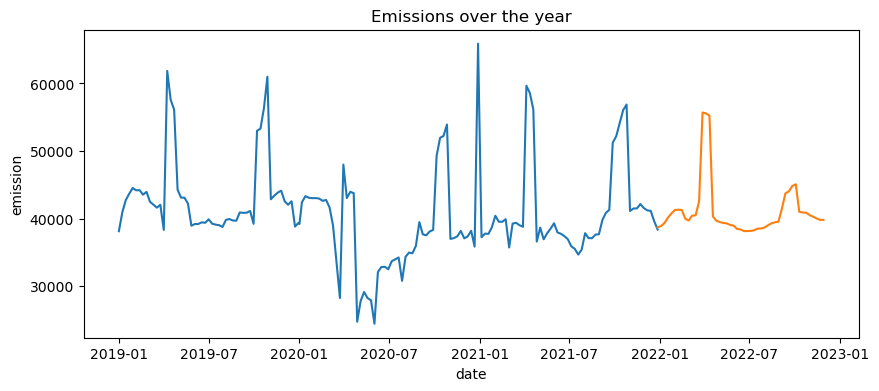

In [64]:
# Not let's have a look at predicted emissions per year
plt.figure(figsize=(10,4))
grouped_emissions_train = plot_data.groupby('date')['emission'].sum()
grouped_emissions_test = plot_data_test.groupby('date')['emission'].sum()
ax1 = sb.lineplot(data=grouped_emissions_train)
ax2 = sb.lineplot(data=grouped_emissions_test)

plt.title("Emissions over the year with predicted timeframe")